In [1]:
# !pip install graphviz pydotplus

In [2]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [4]:
df_train=pd.read_csv("StudentPerformance.csv")

In [5]:
df_train.head()

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,female,bachelor's degree,none,72,72,74,88,69,86.0,3,15,90,no,75.0,Pass,83
1,2,female,some college,completed,69,90,88,76,63,86.0,1,15,90,yes,77.2,Pass,94
2,3,female,master's degree,none,90,95,93,95,56,86.0,2,15,90,no,85.8,Pass,70
3,4,male,associate's degree,Partialy completed,47,57,44,94,40,85.0,2,15,90,yes,56.4,Fail,70
4,5,male,some college,none,76,78,75,77,97,86.0,2,15,90,no,80.6,Pass,67


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student_id                                    1014 non-null   int64  
 1   gender                                        1014 non-null   object 
 2   parental level of education                   1014 non-null   object 
 3   test preparation course                       1014 non-null   object 
 4   Software Engineering score                    1014 non-null   int64  
 5   Machine Learningscore                         1014 non-null   int64  
 6   DBMS score                                    1014 non-null   int64  
 7   Elective 1 score                              1014 non-null   int64  
 8   Elective 2 score                              1014 non-null   int64  
 9   Attendance                                    1014 non-null   f

In [7]:
df_train.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

In [8]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Pass/Fail"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('Fail', 442), ('Pass', 572)]

<AxesSubplot:>

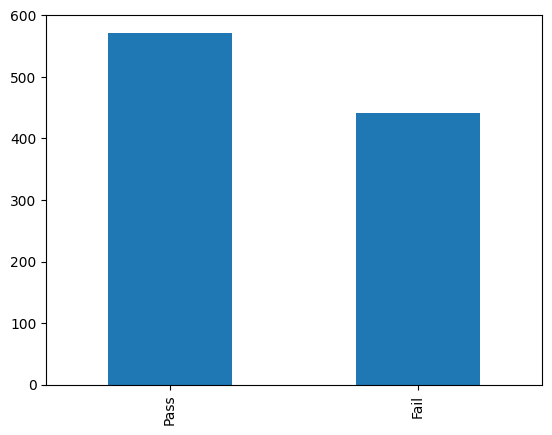

In [9]:
df_train['Pass/Fail'].value_counts().plot(kind='bar')

In [10]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [11]:
label_encoders

{'gender': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'test preparation course': LabelEncoder(),
 'Participation in extra cirricular activities': LabelEncoder(),
 'Pass/Fail': LabelEncoder()}

In [12]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,0,1,3,72,72,74,88,69,86.0,3,15,90,0,75.0,1,83
1,2,0,4,2,69,90,88,76,63,86.0,1,15,90,2,77.2,1,94
2,3,0,3,3,90,95,93,95,56,86.0,2,15,90,0,85.8,1,70
3,4,1,0,1,47,57,44,94,40,85.0,2,15,90,2,56.4,0,70
4,5,1,4,3,76,78,75,77,97,86.0,2,15,90,0,80.6,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1010,1,1,3,77,63,73,73,57,87.0,6,16,75,1,68.6,1,80
1010,1011,1,1,0,73,88,77,74,88,90.0,4,19,75,0,80.0,1,89
1011,1012,0,1,3,78,70,81,75,83,80.0,3,15,150,1,77.4,1,77
1012,1013,0,1,3,70,70,80,60,80,91.0,3,17,25,0,72.0,1,75


In [13]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [14]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [15]:
to_scale

['Student_id',
 'parental level of education',
 'test preparation course',
 'Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score',
 'Attendance',
 'Study hours/Day',
 'Assignment marks',
 'Time spent on social media in mins',
 'Participation in extra cirricular activities',
 'Current Sem percentage',
 'Previous sem percentage']

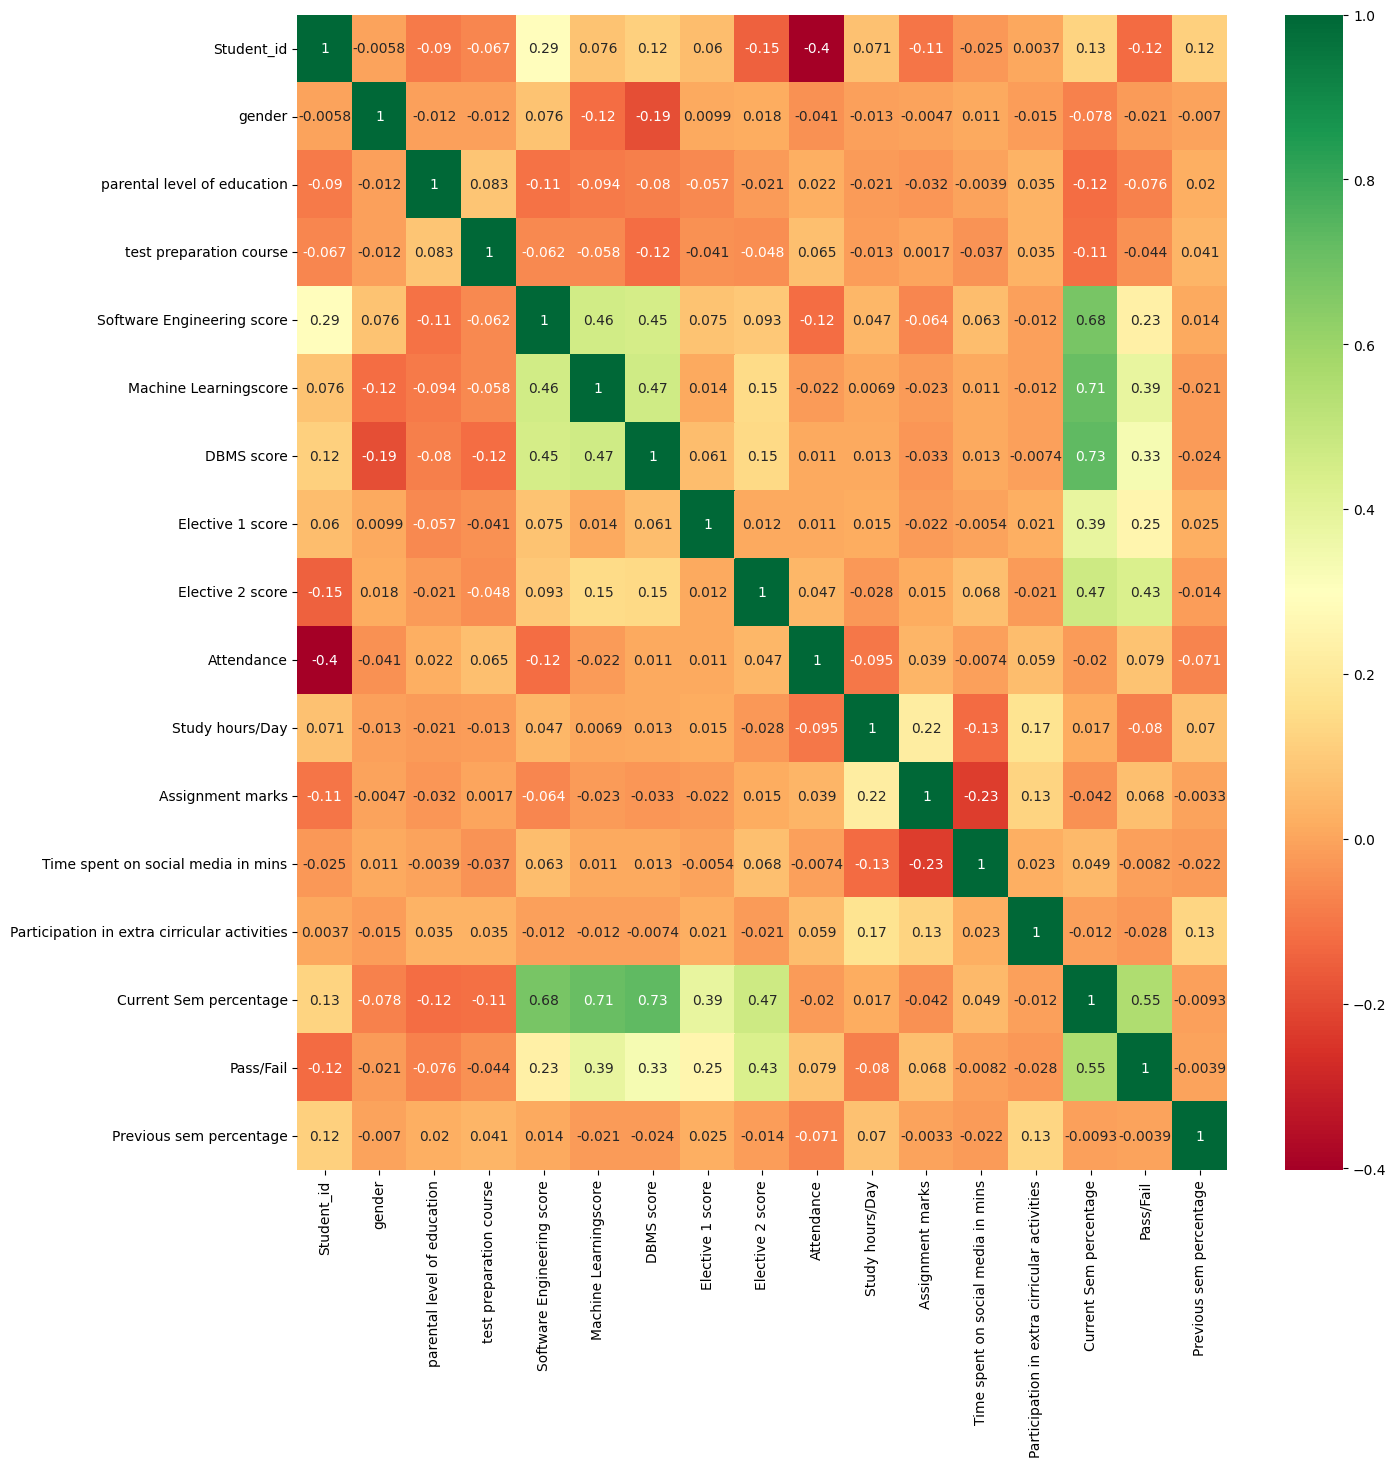

In [16]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
Y=encoded_df["Pass/Fail"]
print(X.shape)
print(Y.shape)

(1014, 14)
(1014,)


In [18]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [19]:
print(X_train.shape)
print(X_test.shape)

(760, 14)
(254, 14)


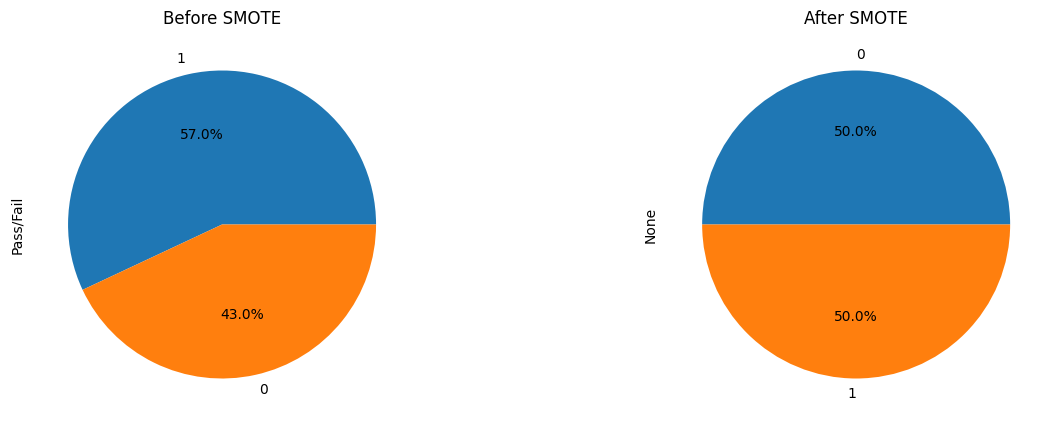

In [21]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.values.ravel())
import matplotlib.ticker as mtick

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

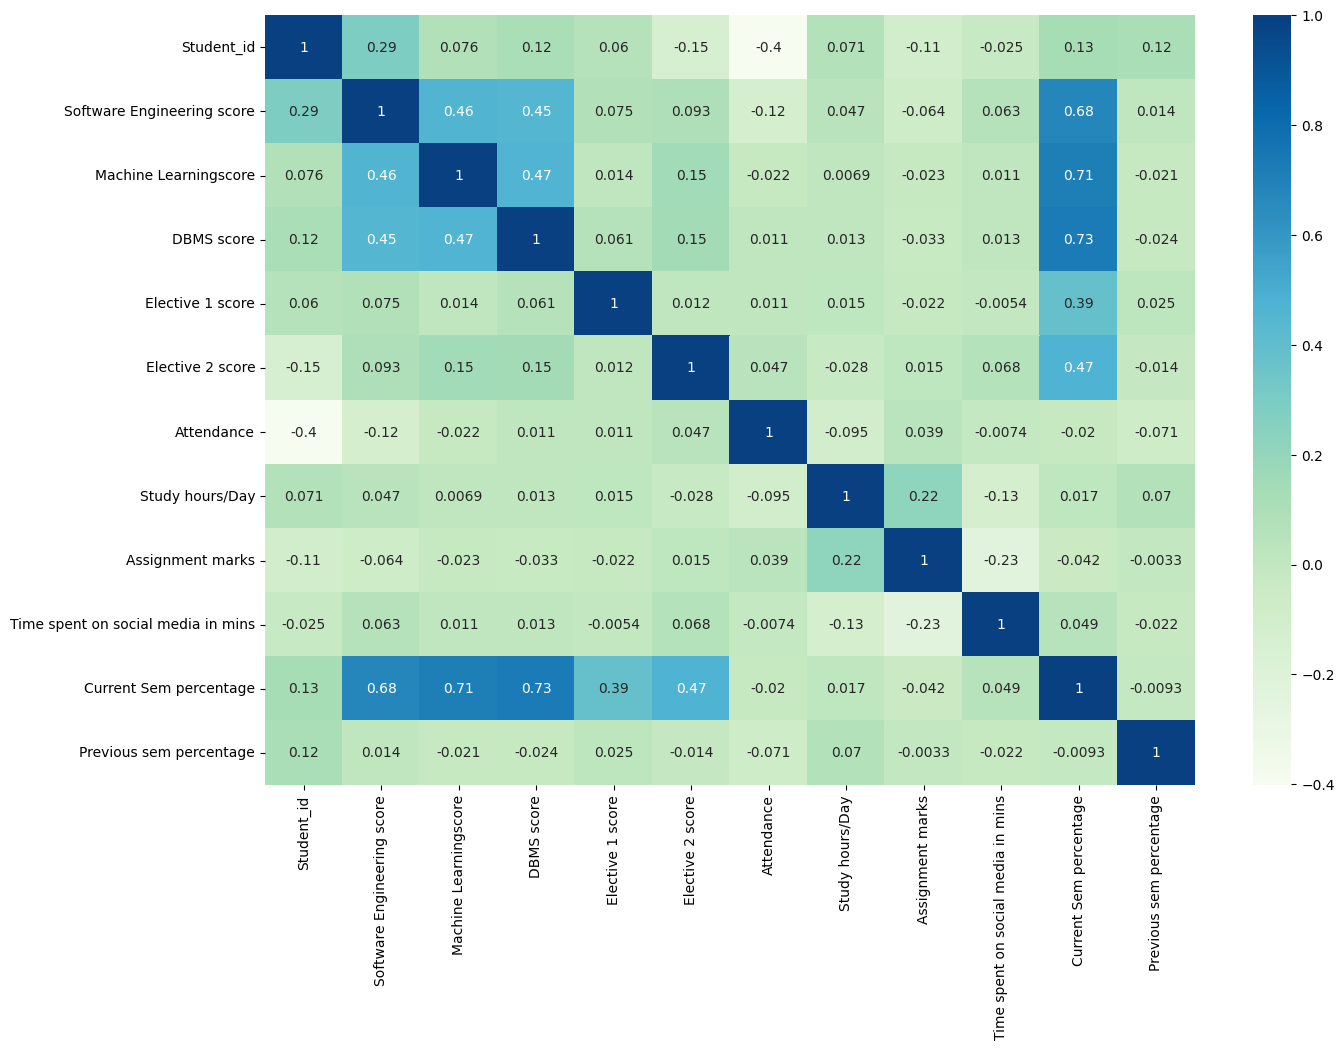

In [22]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

In [23]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred=lr.predict(X_test)

In [24]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.8188976377952756


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report Logistic Regression : \n',matrix)

Confusion matrix : 
 [[119  20]
 [ 26  89]]
Outcome values : 
 119 20 26 89
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84       139
           0       0.82      0.77      0.79       115

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



In [26]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("LogisticRegression:",metrics.accuracy_score(y_test, y_pred))

# Save the trained model to a file using joblib
model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
joblib.dump(lr, model_filename1)
print(f"Model saved as {model_filename1}")

LogisticRegression: 0.8188976377952756
Model saved as models/Logistic_Regression_Classify_model.joblib


In [27]:
X_test.shape

(254, 14)

In [28]:
X_train_new

,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Previous sem percentage
0,0,0.500000,0.000000,0.722222,-0.336842,-0.880000,0.385542,-1.142857,-1.833333,-0.500000,-0.600000,-0.333333,-1.0,0.857143
1,0,0.750000,1.000000,-0.222222,0.000000,-0.040000,-0.481928,0.142857,-0.388889,-0.500000,0.000000,0.666667,0.0,0.000000
2,1,0.750000,1.000000,-0.444444,-0.842105,-0.680000,-0.481928,-0.619048,-0.055556,-0.500000,0.000000,0.000000,0.0,0.000000
3,1,-0.500000,0.000000,0.944444,1.305263,1.040000,-0.867470,-0.380952,0.833333,0.000000,-0.200000,-0.333333,1.0,-0.714286
4,1,0.500000,1.000000,-0.611111,-0.378947,-0.440000,-0.867470,-0.761905,0.277778,0.000000,0.600000,-0.333333,1.0,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,0.605243,1.000000,-0.842027,-0.762243,-0.816776,0.202953,-1.305760,-0.345071,-0.210485,0.684194,-0.403495,1.0,-0.590208
862,1,-0.500000,-0.436532,-0.194874,-0.438781,-0.415232,0.918348,-0.590299,0.235466,0.500000,-1.000000,0.103199,1.0,-0.311809
863,0,0.750000,0.000000,-0.264294,-1.104956,-0.269049,-0.056988,0.512252,-0.025243,-0.424271,0.218251,-0.262621,1.0,0.471845
864,0,0.539085,0.000000,0.024416,0.551342,0.418761,-1.108434,-1.285714,0.888889,-0.500000,-0.800000,0.666667,0.0,-0.357143


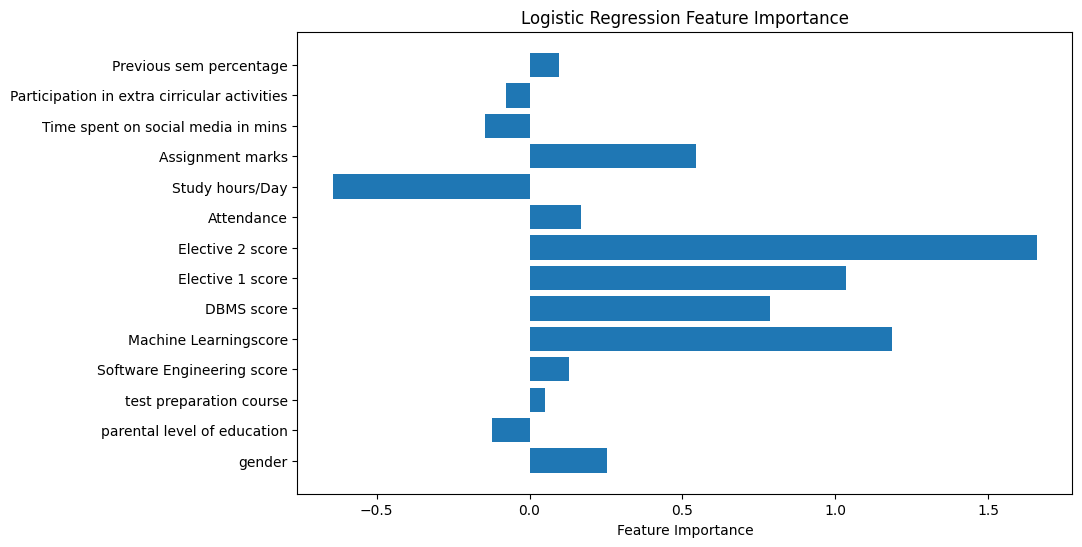

In [29]:
feature_importances = lr.coef_[0]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train_new.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

In [30]:
X

,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Previous sem percentage
0,0,-0.25,1.0,0.111111,0.126316,0.20,1.012048,0.190476,0.333333,0.5,0.0,0.500000,-1.0,0.571429
1,0,0.50,0.0,-0.055556,0.884211,0.76,0.433735,-0.095238,0.333333,-0.5,0.0,0.500000,1.0,1.357143
2,0,0.25,1.0,1.111111,1.094737,0.96,1.349398,-0.428571,0.333333,0.0,0.0,0.500000,-1.0,-0.357143
3,1,-0.50,-1.0,-1.277778,-0.505263,-1.00,1.301205,-1.190476,0.277778,0.0,0.0,0.500000,1.0,-0.357143
4,1,0.50,1.0,0.333333,0.378947,0.24,0.481928,1.523810,0.333333,0.0,0.0,0.500000,-1.0,-0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1,-0.25,1.0,0.388889,-0.252632,0.16,0.289157,-0.380952,0.388889,2.0,0.2,0.250000,0.0,0.357143
1010,1,-0.25,-2.0,0.166667,0.800000,0.32,0.337349,1.095238,0.555556,1.0,0.8,0.250000,-1.0,1.000000
1011,0,-0.25,1.0,0.444444,0.042105,0.48,0.385542,0.857143,0.000000,0.5,0.0,1.500000,0.0,0.142857
1012,0,-0.25,1.0,0.000000,0.042105,0.44,-0.337349,0.714286,0.611111,0.5,0.4,-0.583333,-1.0,0.000000


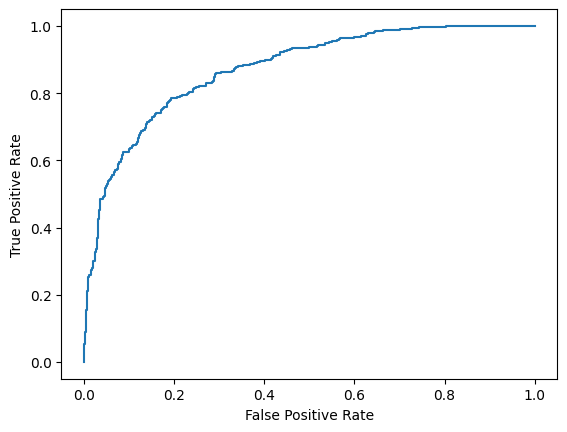

In [31]:
#define metrics
y_pred_proba = lr.predict_proba(X_train_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train_new,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
fpr,tpr

(array([0.        , 0.        , 0.        , 0.00230947, 0.00230947,
        0.00461894, 0.00461894, 0.00692841, 0.00692841, 0.00923788,
        0.00923788, 0.01154734, 0.01154734, 0.01616628, 0.01616628,
        0.01847575, 0.01847575, 0.02078522, 0.02078522, 0.02540416,
        0.02540416, 0.02771363, 0.02771363, 0.03002309, 0.03002309,
        0.03233256, 0.03233256, 0.03464203, 0.03464203, 0.0369515 ,
        0.0369515 , 0.04157044, 0.04157044, 0.04387991, 0.04387991,
        0.04618938, 0.04618938, 0.04849885, 0.04849885, 0.05080831,
        0.05080831, 0.05311778, 0.05311778, 0.05542725, 0.05542725,
        0.05773672, 0.05773672, 0.06004619, 0.06004619, 0.06235566,
        0.06235566, 0.0669746 , 0.0669746 , 0.06928406, 0.06928406,
        0.073903  , 0.073903  , 0.07621247, 0.07621247, 0.07852194,
        0.07852194, 0.08314088, 0.08314088, 0.08545035, 0.08545035,
        0.08775982, 0.08775982, 0.09930716, 0.09930716, 0.10161663,
        0.10161663, 0.10623557, 0.10623557, 0.10

In [33]:
y_test

276    1
324    0
418    1
916    0
253    1
      ..
540    1
888    0
715    1
776    0
31     1
Name: Pass/Fail, Length: 254, dtype: int32

In [34]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred4=classifier.predict(X_test)

In [35]:
from ipywidgets import interact, widgets

In [36]:
X_test

,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Previous sem percentage
276,0,0.75,0.0,0.833333,0.968421,0.96,0.433735,1.333333,0.444444,0.0,0.2,0.333333,1.0,-0.500000
324,0,0.00,-1.0,-1.611111,-0.968421,-1.04,0.385542,-0.619048,1.055556,0.0,0.6,-0.333333,1.0,0.357143
418,1,0.50,1.0,-0.111111,-0.421053,-0.28,-0.096386,-0.619048,0.055556,-0.5,-1.2,0.666667,0.0,0.357143
916,0,0.00,1.0,0.944444,1.136842,1.00,-1.156627,0.523810,-1.000000,0.5,0.4,-0.333333,1.0,0.214286
253,1,0.25,1.0,0.555556,0.463158,0.12,-0.048193,0.333333,0.333333,0.0,-0.2,0.250000,1.0,-0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,0.00,0.0,0.277778,0.000000,-0.04,-0.481928,0.190476,-0.166667,-0.5,0.0,0.000000,-1.0,0.000000
888,1,0.00,0.0,0.777778,0.926316,-0.68,0.337349,-0.952381,1.000000,0.0,0.6,-0.333333,1.0,-0.214286
715,0,-0.50,1.0,-0.500000,-0.589474,0.60,0.048193,0.333333,-0.166667,-0.5,-0.4,2.333333,1.0,0.571429
776,0,0.00,0.0,0.611111,-0.800000,1.24,-0.963855,-0.333333,0.444444,-0.5,-0.4,0.000000,1.0,-1.642857


In [37]:
encoded_df.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

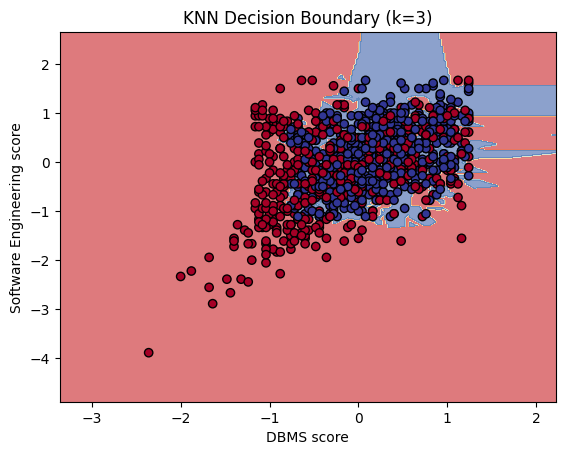

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X=encoded_df[['DBMS score','Software Engineering score']].values
y=encoded_df['Pass/Fail'].values
# Create a KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the data
knn.fit(X, y)

# Define a mesh grid to create a decision boundary plot
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title(f'KNN Decision Boundary (k={k})')
plt.xlabel('DBMS score')
plt.ylabel('Software Engineering score')
plt.show()

In [39]:
from sklearn import metrics
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred4))

Accuracy KNN: 0.8188976377952756


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification KNeighborsClassifier : \n',matrix)

Confusion matrix : 
 [[125  14]
 [ 32  83]]
Outcome values : 
 125 14 32 83
Classification KNeighborsClassifier : 
               precision    recall  f1-score   support

           1       0.80      0.90      0.84       139
           0       0.86      0.72      0.78       115

    accuracy                           0.82       254
   macro avg       0.83      0.81      0.81       254
weighted avg       0.82      0.82      0.82       254



In [41]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/KNeighbors_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

KNeighborsClassifier : 0.8188976377952756
Model saved as models/KNeighbors_Classifier_Classify_model.joblib


In [42]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [43]:
y_pred1 = clf.predict(X_test)

In [44]:
# X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
# Y=encoded_df["Pass/Fail"]

In [45]:
X

array([[ 0.2       ,  0.11111111],
       [ 0.76      , -0.05555556],
       [ 0.96      ,  1.11111111],
       ...,
       [ 0.48      ,  0.44444444],
       [ 0.44      ,  0.        ],
       [-0.2       , -0.27777778]])

In [46]:
feature_importances = clf.feature_importances_
print(feature_importances)

[0.         0.         0.         0.09160048 0.21896063 0.13781328
 0.24440663 0.28845826 0.00192456 0.0034642  0.00621261 0.0034642
 0.00369515 0.        ]


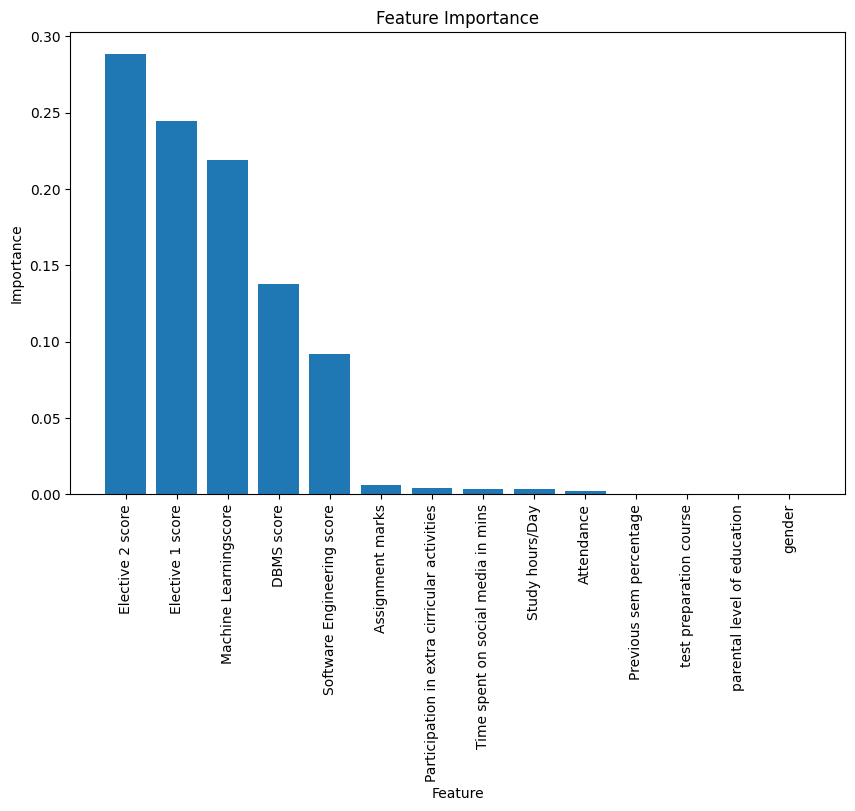

In [47]:
# Replace this with your actual feature names in the same order as your dataset
feature_names = X_train_new.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_new.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_new.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [48]:
# from sklearn import tree
# plt.figure(figsize=(250, 200))
# tree.plot_tree(clf, feature_names=X_train_new.columns)

# #Two  lines to make our compiler able to draw:
# plt.savefig('a.jpg')

In [49]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_text
tree_text = export_text(clf, feature_names=X_train_new.columns.tolist(), spacing=3, decimals=2)
print(tree_text)


|--- Elective 2 score <= -0.68
|   |--- Elective 2 score <= -0.72
|   |   |--- class: 0
|   |--- Elective 2 score >  -0.72
|   |   |--- Machine Learningscore <= 0.13
|   |   |   |--- Attendance <= -0.58
|   |   |   |   |--- Assignment marks <= 0.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Assignment marks >  0.40
|   |   |   |   |   |--- class: 0
|   |   |   |--- Attendance >  -0.58
|   |   |   |   |--- class: 0
|   |   |--- Machine Learningscore >  0.13
|   |   |   |--- Participation in extra cirricular activities <= -0.16
|   |   |   |   |--- class: 0
|   |   |   |--- Participation in extra cirricular activities >  -0.16
|   |   |   |   |--- class: 1
|--- Elective 2 score >  -0.68
|   |--- Machine Learningscore <= -0.60
|   |   |--- Machine Learningscore <= -0.80
|   |   |   |--- class: 0
|   |   |--- Machine Learningscore >  -0.80
|   |   |   |--- DBMS score <= -0.72
|   |   |   |   |--- class: 0
|   |   |   |--- DBMS score >  -0.72
|   |   |   |   |--- Software Engine

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification DecisionTreeClassifier : \n',matrix)

Confusion matrix : 
 [[135   4]
 [  1 114]]
Outcome values : 
 135 4 1 114
Classification DecisionTreeClassifier : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       139
           0       0.97      0.99      0.98       115

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



In [51]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/DecisionTree_Classifier_Classify_model.joblib"
joblib.dump(clf, model_filename1)
print(f"Model saved as {model_filename1}")

DecisionTreeClassifier  : 0.8188976377952756
Model saved as models/DecisionTree_Classifier_Classify_model.joblib


In [52]:
model = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

# svm

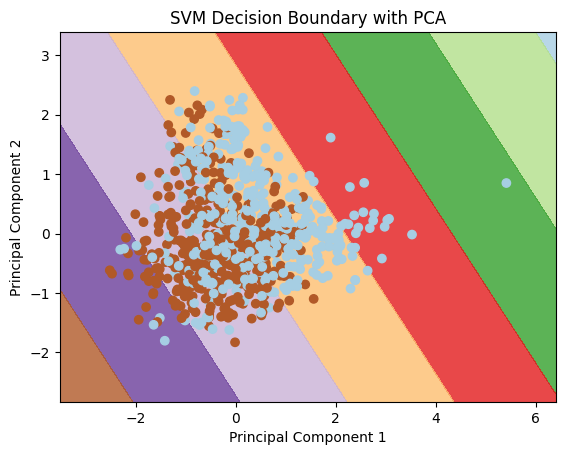

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Apply PCA to reduce the dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_new)
y=y_train_new
# Create an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_reduced, y)

# Create a mesh grid to visualize the decision boundary
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()


In [54]:
X_train_new

,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Previous sem percentage
0,0,0.500000,0.000000,0.722222,-0.336842,-0.880000,0.385542,-1.142857,-1.833333,-0.500000,-0.600000,-0.333333,-1.0,0.857143
1,0,0.750000,1.000000,-0.222222,0.000000,-0.040000,-0.481928,0.142857,-0.388889,-0.500000,0.000000,0.666667,0.0,0.000000
2,1,0.750000,1.000000,-0.444444,-0.842105,-0.680000,-0.481928,-0.619048,-0.055556,-0.500000,0.000000,0.000000,0.0,0.000000
3,1,-0.500000,0.000000,0.944444,1.305263,1.040000,-0.867470,-0.380952,0.833333,0.000000,-0.200000,-0.333333,1.0,-0.714286
4,1,0.500000,1.000000,-0.611111,-0.378947,-0.440000,-0.867470,-0.761905,0.277778,0.000000,0.600000,-0.333333,1.0,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,0.605243,1.000000,-0.842027,-0.762243,-0.816776,0.202953,-1.305760,-0.345071,-0.210485,0.684194,-0.403495,1.0,-0.590208
862,1,-0.500000,-0.436532,-0.194874,-0.438781,-0.415232,0.918348,-0.590299,0.235466,0.500000,-1.000000,0.103199,1.0,-0.311809
863,0,0.750000,0.000000,-0.264294,-1.104956,-0.269049,-0.056988,0.512252,-0.025243,-0.424271,0.218251,-0.262621,1.0,0.471845
864,0,0.539085,0.000000,0.024416,0.551342,0.418761,-1.108434,-1.285714,0.888889,-0.500000,-0.800000,0.666667,0.0,-0.357143


In [55]:
X_train_new.iloc[:, 5]

0     -0.880000
1     -0.040000
2     -0.680000
3      1.040000
4     -0.440000
         ...   
861   -0.816776
862   -0.415232
863   -0.269049
864    0.418761
865   -0.447742
Name: DBMS score, Length: 866, dtype: float64

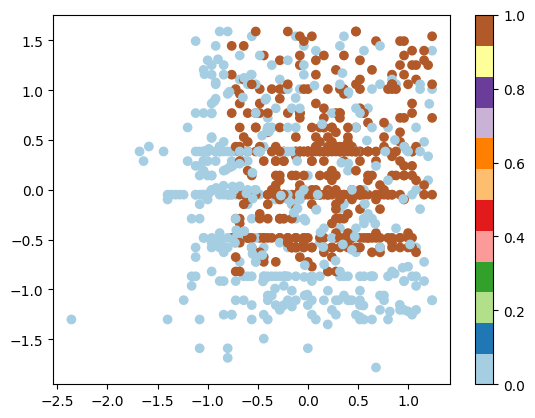

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from matplotlib.animation import FuncAnimation
# Train an SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train_new, y_train_new)

# Create a 2D scatter plot of the data points
def plot_data():
    plt.scatter(X_train_new.iloc[:, 5], X_train_new.iloc[:, 6], c=y_train_new, cmap=plt.cm.Paired)

# Create a function to plot the hyperplane
def plot_hyperplane(coef, intercept):
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
    plt.contour(xx, yy, zz, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Create an animation to move the hyperplane
fig, ax = plt.subplots()
ani = FuncAnimation(fig, lambda i: plot_hyperplane(clf.coef_[0], clf.intercept_[0] - i * 0.05),
                    frames=range(50), repeat=True)
plt.colorbar(plot_data(), ax=ax)

plt.show()

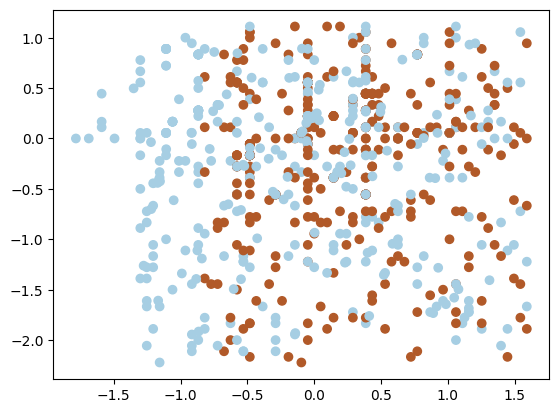

In [57]:
plt.scatter(X_train_new.iloc[:, 6], X_train_new.iloc[:, 8], c=y_train_new, cmap=plt.cm.Paired)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred2

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[119  20]
 [ 27  88]]
Outcome values : 
 119 20 27 88
Classification SVC : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84       139
           0       0.81      0.77      0.79       115

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [59]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/SVC_linear_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

SVC: 0.8188976377952756
Model saved as models/SVC_linear_Classify_model.joblib


In [60]:
model1 = SVC(kernel='rbf')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model1.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred10 = model1.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred10

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[125  14]
 [ 10 105]]
Outcome values : 
 125 14 10 105
Classification SVC : 
               precision    recall  f1-score   support

           1       0.93      0.90      0.91       139
           0       0.88      0.91      0.90       115

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.90       254
weighted avg       0.91      0.91      0.91       254



In [62]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC rbf:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/SVC_rbf_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

SVC rbf: 0.8188976377952756
Model saved as models/SVC_rbf_Classify_model.joblib


# RandomForestClassifier

In [63]:
# Create an instance of the DecisionTreeClassifier
random = RandomForestClassifier()

# Fit the model to your training data
random.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [64]:
# Make predictions on the test data
y_pred5 = model.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[119  20]
 [ 27  88]]
Outcome values : 
 119 20 27 88
Classification SVC : 
               precision    recall  f1-score   support

           1       0.82      0.86      0.84       139
           0       0.81      0.77      0.79       115

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [66]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy random_forest:",metrics.accuracy_score(y_test, y_pred5))

# Save the trained model to a file using joblib
model_filename1 = "models/RandomForestClassifier_Classify_model.joblib"
joblib.dump(random, model_filename1)
print(f"Model saved as {model_filename1}")

Accuracy random_forest: 0.8149606299212598
Model saved as models/RandomForestClassifier_Classify_model.joblib


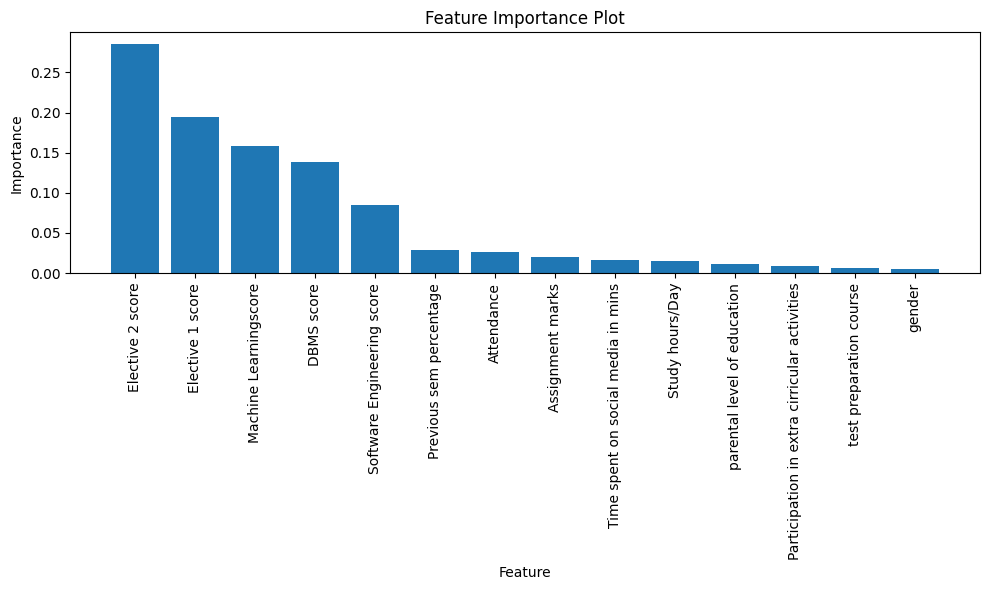

In [67]:
# Get feature importances from the model
importances = random.feature_importances_

# Get the feature names
feature_names = X_train_new.columns  # Replace with your feature names if needed

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Plot")
plt.bar(range(X_train_new.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train_new.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [68]:
# You can also get feature importances
feature_importances = random.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')

Feature Importances:
gender: 0.0055916205895588655
parental level of education: 0.011916899722141041
test preparation course: 0.006894543502153141
Software Engineering score: 0.08525745912012639
Machine Learningscore: 0.15825314768885637
DBMS score: 0.1385168550970577
Elective 1 score: 0.19385293825954894
Elective 2 score: 0.2855889402420434
Attendance: 0.02598011036969988
Study hours/Day: 0.015196661232892648
Assignment marks: 0.01966976154602919
Time spent on social media in mins: 0.016413170561012484
Participation in extra cirricular activities: 0.008712967530462558
Previous sem percentage: 0.028154924538417517


In [69]:
import pandas as pd
import numpy as np

def bootstrap_sample_df(df, n_samples):
    n_data = len(df)
    bootstrap_samples = []
    for _ in range(n_samples):
        sample_indices = np.random.randint(0, n_data, n_data)
        sample = df.iloc[sample_indices]
        bootstrap_samples.append(sample)
    return bootstrap_samples
n_bootstrap_samples = 5
bootstrap_samples = bootstrap_sample_df(X_train_new, n_bootstrap_samples)

for i, sample in enumerate(bootstrap_samples):
    print(f"Bootstrap Sample {i + 1}:\n{sample}")

Bootstrap Sample 1:
     gender  parental level of education  test preparation course  \
806       0                     0.742816                 1.000000   
74        1                     0.000000                 0.000000   
628       0                     0.000000                 1.000000   
193       1                     0.000000                -1.000000   
334       1                     0.000000                 1.000000   
..      ...                          ...                      ...   
285       1                    -0.250000                 1.000000   
839       1                     0.000000                -0.065237   
734       1                    -0.500000                 1.000000   
468       0                     0.250000                 1.000000   
511       1                     0.750000                 1.000000   

     Software Engineering score  Machine Learningscore  DBMS score  \
806                   -1.774052              -0.842509   -0.959617   
74         

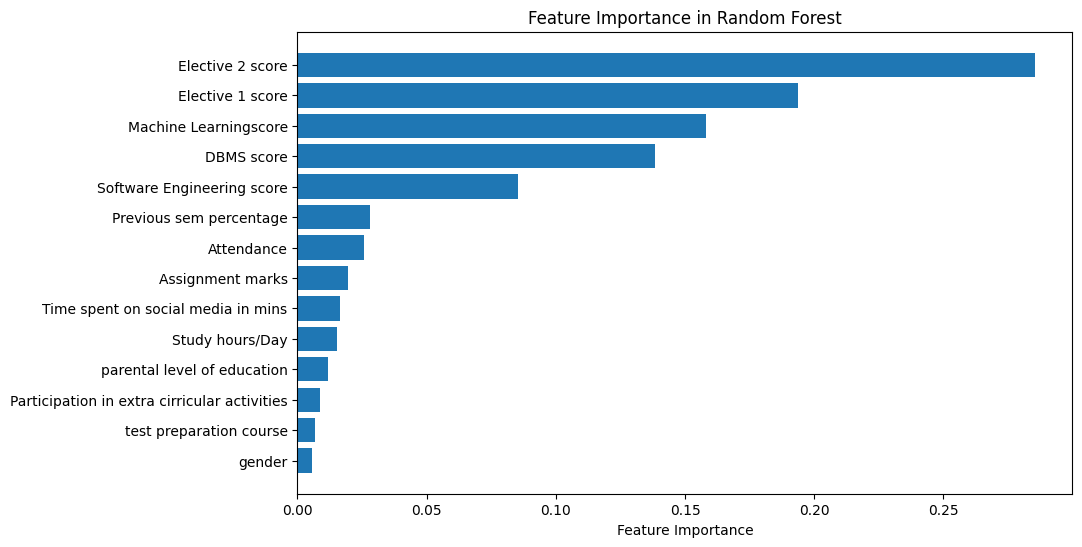

Selected Features: ['Elective 1 score', 'Elective 2 score']


In [70]:
# Get the names of the features
feature_names = X_train_new.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

# Random feature selection for visualization (e.g., top 2 features)
selected_features = [feature_names[i] for i in sorted_idx[-2:]]

# Visualize the selected features
print("Selected Features:", selected_features)

In [71]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank white image
width, height = 800, 600
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# Define the text and font
text = "Hello, World!"
font = ImageFont.truetype("arial.ttf", 30)
font1 = ImageFont.truetype("arial.ttf", 25)

# Define starting position
x, y = 10, 10

# Loop to draw text multiple times

print('Feature Importances:')
draw.text((x, y),'Feature Importances:', fill="black", font=font)
y += 40 
for feature, importance in zip(X_train_new.columns, feature_importances):
    print(f'{feature}: {importance}')
    draw.text((x, y), str(feature)+': '+str(importance), fill="black", font=font1)
    y += 30  # Move down for the next iteration

# Save the image
image.save("output.png")


Feature Importances:
gender: 0.0055916205895588655
parental level of education: 0.011916899722141041
test preparation course: 0.006894543502153141
Software Engineering score: 0.08525745912012639
Machine Learningscore: 0.15825314768885637
DBMS score: 0.1385168550970577
Elective 1 score: 0.19385293825954894
Elective 2 score: 0.2855889402420434
Attendance: 0.02598011036969988
Study hours/Day: 0.015196661232892648
Assignment marks: 0.01966976154602919
Time spent on social media in mins: 0.016413170561012484
Participation in extra cirricular activities: 0.008712967530462558
Previous sem percentage: 0.028154924538417517
